###Choosing genomes to work with:

In [25]:
Hosts=["Mycobacterium", "Synechococcus","Vibrio"]

paccs=[]
phage_info=open("./data/top_host_phage_info.txt")
for line in phage_info.readlines():
    host=line.split("\t")[0]
    trna_count=line.split("\t")[-3]
    name=line.split("\t")[3]
    if host in Hosts and int(trna_count)>10:
        print(line)

>going to choose synechococcus phage S-PM2; Vibriophage KVP40 and Mycobacterium phage Rey

In [27]:
def find_phages(phage_list):
    phage_accs=[]
    for i in phage_list:
        for line in open("./data/top_host_phage_info.txt").readlines():
            if i in line:
                #print(line)
                phage_accs.append(line.split("\t")[2])
    return(phage_accs)

In [28]:
#####start here after initial setup#####
phages=["Synechococcus phage S-PM2","KVP40", "Rey", ""]
#paccs=[]
hosts=["Syn7803","VibPara", "Msmeg155"]

paccs=find_phages(phages)
print(paccs)
#for phage in phages:    
 #   for line in open("./data/top_host_phage_info.txt").readlines():
  #      if phage in line:
   #         paccs.append(line.split("\t")[2])
#print(paccs)

['NC_006820.1', 'NC_005083.2', 'JF937105.1']


In [4]:
import subprocess

for x in paccs:
    x1="./data/pgenomes/"+x+".gbk"
    subprocess.call(["cp",x1, "./data/svm1/"])
    print(x+" copied")

NC_006820.1 copied
NC_005083.2 copied
JF937105.1 copied


Now I've got host genomes and phage genomes.

All genomes to work with are located in ./data/svm1/

###Next must extract genes as nucleic acid sequences from each gbk file:

In [29]:
from tRNA_functions import *

###Next I'm going to try out the tai.R scripts on the host genomes

Scripts include codonM and tai.R; codonM is a perl script that calculates codon frequencies, and tai.R is an R script that calculates tai for each gene.

Wrote submission scripts for codonM, codonW, tRNA scan and how to export annotations from gbk files into one big file currently called "tRNA_functions.py".  This will be standardized from now on based on that file.

In [30]:
%load_ext rpy2.ipython
%R library(dplyr);library(magrittr); library(ggplot2); library(reshape); library(parody)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


<StrVector - Python:0x109ca6b90 / R:0x1012501f8>
[str, str, str, ..., str, str, str]

In [31]:
%%R
##Functions:

source("./scripts/phage_host_tAI.R")

 [1] 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 2 0 3 0 1
[39] 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 2 1 0 1 1 0 0 1 1 1
 [1] 0 2 1 1 0 1 1 1 0 1 0 0 0 2 0 2 0 1 2 1 0 1 2 1 0 2 1 1 2 0 0 1 0 3 0 4 1 1
[39] 1 1 0 2 1 1 0 1 1 1 0 1 2 1 0 1 2 2 0 2 1 1 0 1 2 1


Read 154513 items
Read 294752 items
Read 408273 items


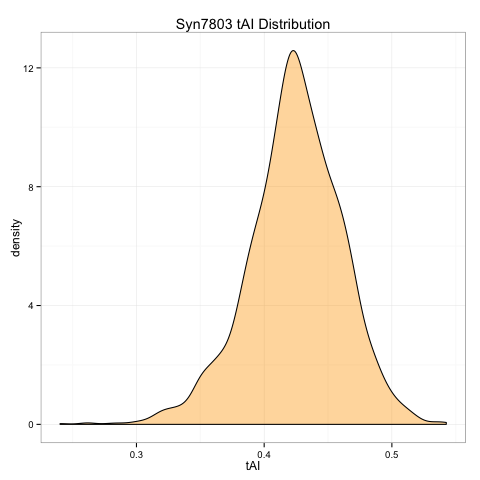

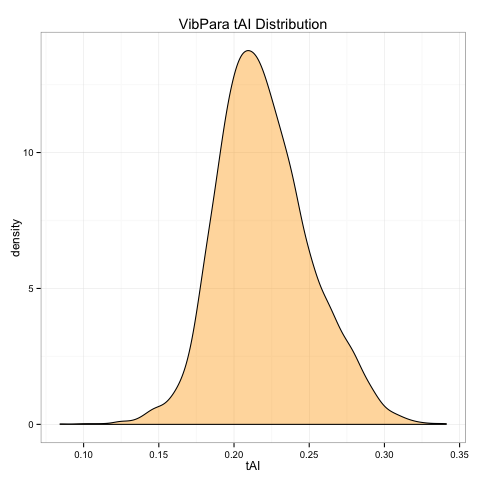

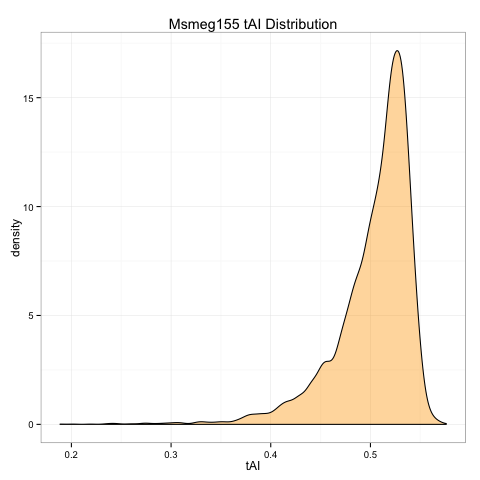

In [32]:
%%R -i hosts
for (h in hosts){
    tscanfile<-paste("./data/svm1/", h, ".trna", sep="")
    h.trna<-tscan_to_list(tscanfile)
    h.ws<-get.ws(tRNA=h.trna, sking=1)
    h.m<-matrix(scan(paste("./data/svm1/",h,".cds.m", sep="")),ncol=61, byrow=T)
    h.m<-h.m[,-33]
    h.tai<-get.tai(h.m, h.ws)
    ggplot(data.frame(h.tai), aes(h.tai))+geom_density(fill="orange",alpha=0.4)+
    labs(title=paste(h, "tAI Distribution"), x="tAI")+theme_bw()->k
    plot(k)
    }

In [34]:
%%R -i paccs -i hosts

i=1

ptrna=paste("./data/svm1/",paccs[i],".trna", sep="")
htrna=paste("./data/svm1/",hosts[i],".trna", sep="")


h_ph_tai<-function(ptrna, htrna, hcodonm, pcodonm, hcodonw, pcodonw){

hcodonw<-hcodonw%>%read.table(sep="\t",header=TRUE, na.strings="*****")
pcodonw<-pcodonw%>%read.table(sep="\t", header=TRUE, na.strings="*****")

hcodonw$title<-gsub(" ","", hcodonw$title)
pcodonw$title<-gsub(" ","", pcodonw$title)

host_tais<-calculate_ph_tais(htrna, ptrna, hcodonm)
host_tais$genome<-"host"
host_tais$title<-hcodonw$title

phage_tais<-calculate_ph_tais(htrna, ptrna, pcodonm)
phage_tais$genome<-"phage"
phage_tais$title<-pcodonw$title

return(rbind.data.frame(host_tais, phage_tais))    

}

h_ph_tai<-function(ptrna, htrna, hcodonm, pcodonm, hcodonw, pcodonw){

hcodonw<-hcodonw%>%read.table(sep="\t",header=TRUE, na.strings="*****")
pcodonw<-pcodonw%>%read.table(sep="\t", header=TRUE, na.strings="*****")

hcodonw$title<-gsub(" ","", hcodonw$title)
pcodonw$title<-gsub(" ","", pcodonw$title)

host_tais<-calculate_ph_tais(htrna, ptrna, hcodonm)
host_tais$genome<-"host"
host_tais$title<-hcodonw$title

phage_tais<-calculate_ph_tais(htrna, ptrna, pcodonm)
phage_tais$genome<-"phage"
phage_tais$title<-pcodonw$title

return(rbind.data.frame(host_tais, phage_tais))    

}

In [35]:
%%R
i=1
#for (i in seq(1,3)){

ptrna=paste("./data/svm1/",paccs[i],".trna", sep="")
htrna=paste("./data/svm1/",hosts[i],".trna", sep="")
hcodonm=paste("./data/svm1/", hosts[i],".cds.m", sep="")
pcodonm=paste("./data/svm1/", paccs[i],".cds.m", sep="")
hcodonw=paste("./data/svm1/", hosts[i], ".w", sep="")
pcodonw=paste("./data/svm1/", paccs[i], ".w", sep="")

hcodonw<-hcodonw%>%read.table(sep="\t",header=TRUE, na.strings="*****")
pcodonw<-pcodonw%>%read.table(sep="\t", header=TRUE, na.strings="*****")

host_tais<-calculate_ph_tais(htrna, ptrna, hcodonm)
host_tais$genome<-"host"
host_tais$title<-hcodonw$title

hcodonw%>%nrow%>%print
pcodonw%>%nrow%>%print
nrow(host_tais)%>%print

[1] "scanning codonM file"
Read 154513 items
[1] 2533
[1] 244
[1] 2533


In [52]:
%%R
i=1
#for (i in seq(1,3)){

ptrna=paste("./data/svm1/",paccs[i],".trna", sep="")
htrna=paste("./data/svm1/",hosts[i],".trna", sep="")
hcodonm=paste("./data/svm1/", hosts[i],".cds.m", sep="")
pcodonm=paste("./data/svm1/", paccs[i],".cds.m", sep="")
hcodonw=paste("./data/svm1/", hosts[i], ".w", sep="")
pcodonw=paste("./data/svm1/", paccs[i], ".w", sep="")

out<-h_ph_tai(ptrna, htrna, hcodonm, pcodonm, hcodonw, pcodonw)
out%>%head%>%print
    
ggplot(out, aes(ph.tai, fill=genome))+geom_density(alpha=0.4)->theplot
theplot<-theplot+theme_bw()+labs(title=paste(paccs[i],hosts[i]))
plot(theplot)
    
ggplot(out, aes(genome, ph.tai))+geom_boxplot()->theplot
theplot<-theplot+theme_bw()+labs(title=paste(paccs[i],hosts[i]))
plot(theplot)
    
    
out2<-melt(out)
out2%>%ggplot(aes(value, fill=genome, alpha=variable))+geom_density()+scale_alpha_manual(values=c(0.4, 0.8))->theplot
    plot(theplot)
    
#}

[1] "scanning codonM file"
Read 154513 items
[1] "scanning codonM file"
Read 14884 items
      h.tai    ph.tai genome          title
1 0.4109584 0.3892384   host SynWH7803_0001
2 0.3449635 0.3491012   host SynWH7803_0002
3 0.4265949 0.3936849   host SynWH7803_0003
4 0.4309958 0.4032255   host SynWH7803_0004
5 0.4148991 0.3987700   host SynWH7803_0005
6 0.4533300 0.4366784   host SynWH7803_0006
Error in `[.data.frame`(x, order(x, na.last = na.last, decreasing = decreasing)) : 
  undefined columns selected


[1] "scanning codonM file"
Read 154513 items
[1] "scanning codonM file"
Read 14884 items
       title     h.tai    ph.tai genome
1  S-PM2p002 0.4006503 0.4124109  phage
2  S-PM2p005 0.4589886 0.4906310  phage
3  S-PM2p007 0.4355148 0.4514941  phage
4  S-PM2p008 0.3868376 0.3908908  phage
5  S-PM2p011 0.4059089 0.4073128  phage
6  S-PM2p012 0.4246168 0.4234677  phage
7  S-PM2p016 0.3721943 0.3692707  phage
8  S-PM2p017 0.4324381 0.3990905  phage
9  S-PM2p021 0.3708526 0.3702272  phage
10 S-PM2p025 0.4148759 0.4307056  phage
11 S-PM2p030 0.3754005 0.3617021  phage
12 S-PM2p032 0.3901940 0.3977068  phage
13 S-PM2p040 0.4046007 0.4009361  phage
14 S-PM2p054 0.4073139 0.4241057  phage
15 S-PM2p055 0.3933330 0.3821498  phage
16 S-PM2p056 0.3657575 0.3535107  phage
17 S-PM2p057 0.4090089 0.4184403  phage
18 S-PM2p058 0.3989411 0.4446308  phage
19 S-PM2p066 0.4197054 0.4465645  phage
20 S-PM2p067 0.4198512 0.3754570  phage
21 S-PM2p070 0.4349002 0.4048715  phage
22 S-PM2p072 0.3698446 0.387344

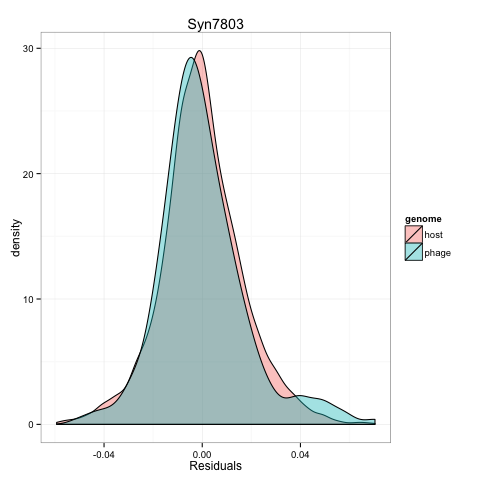

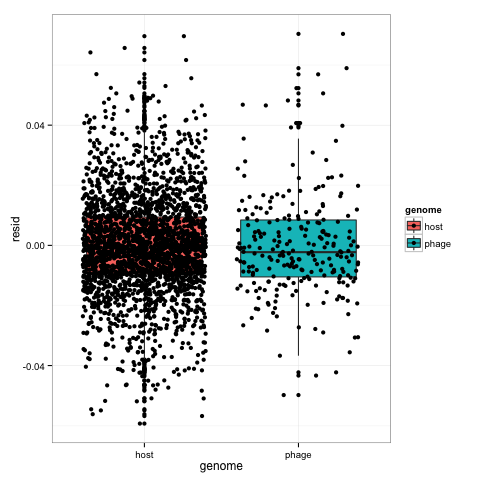

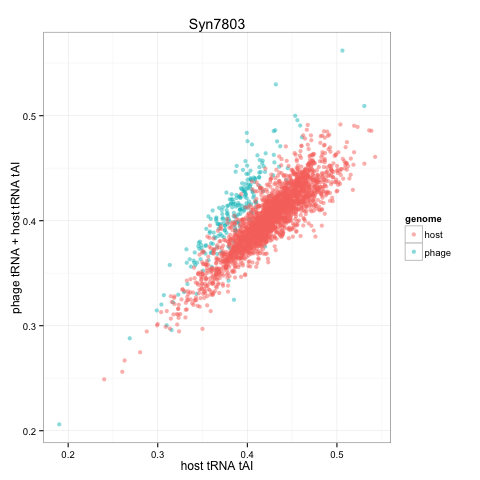

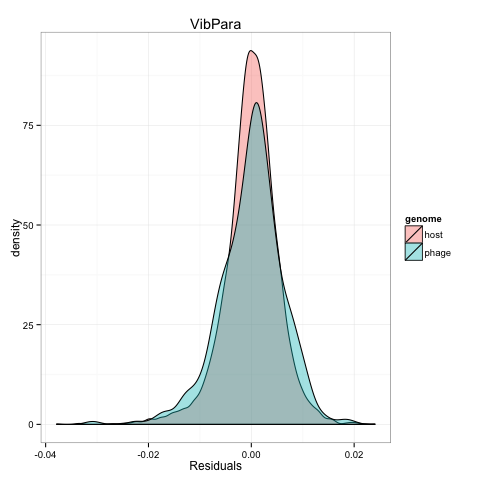

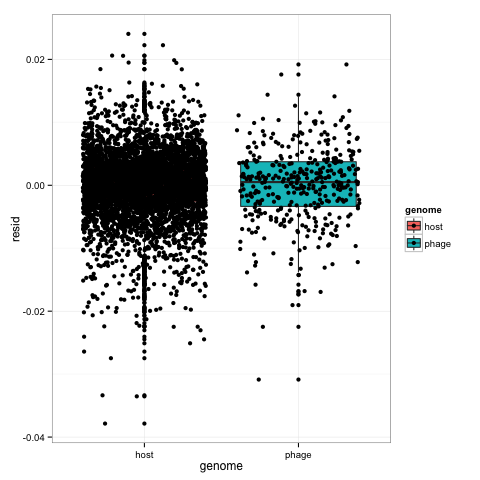

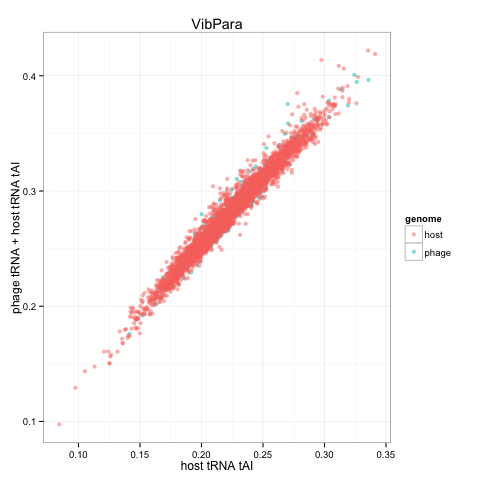

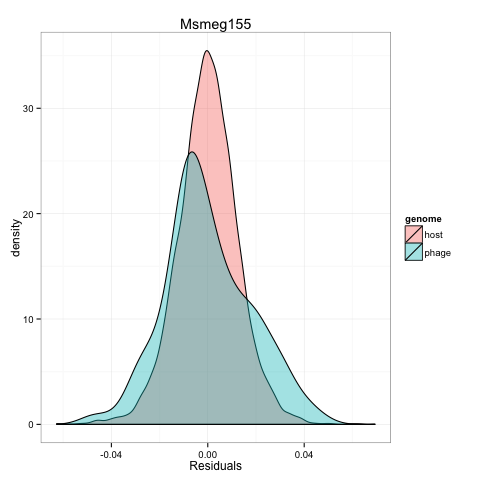

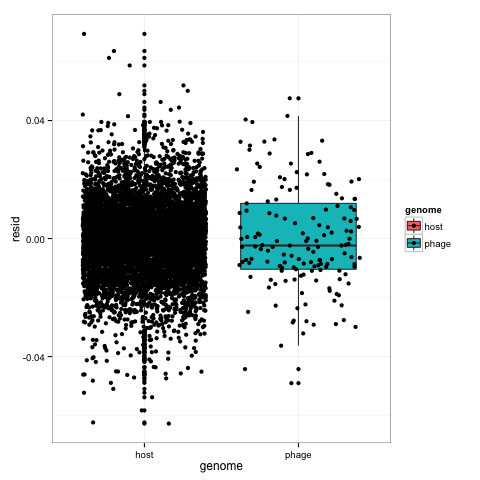

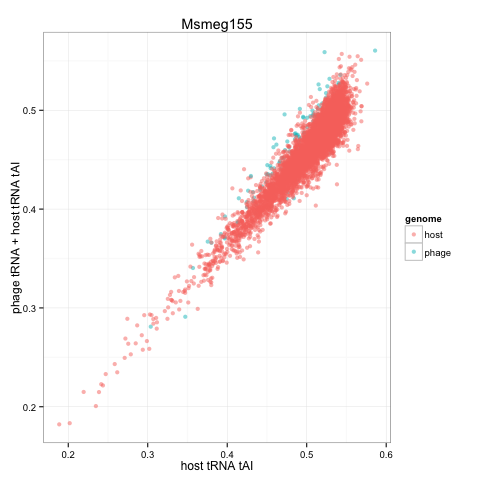

In [42]:
%%R -i paccs
i=1
for (i in seq(1,3)){
    
    host=hosts[i]
    phage=paccs[i]
    
    ptrna=paste("./data/svm1/",phage,".trna", sep="")
    htrna=paste("./data/svm1/",host,".trna", sep="")
    hcodonm=paste("./data/svm1/", host,".cds.m", sep="")
    pcodonm=paste("./data/svm1/", phage,".cds.m", sep="")
    hcodonw=paste("./data/svm1/", host, ".w", sep="")
    pcodonw=paste("./data/svm1/", phage, ".w", sep="")
    hann=paste("./data/svm1/", host, "cds.annotations.txt", sep="")%>%read.table(sep="\t", header=TRUE)
    hann$title<-gsub(" ","",hann$title)
    pann=paste("./data/svm1/", phage, "cds.annotations.txt", sep="")%>%read.table(sep="\t", header=TRUE)
    pann$title<-gsub(" ","",pann$title)
    
    annotations<-rbind.data.frame(hann, pann)
    
    out<-h_ph_tai(ptrna, htrna, hcodonm, pcodonm, hcodonw, pcodonw)
    
    together<-merge(out, annotations, by="title", all.x=TRUE, all.y=TRUE)
    #print(head(together))
    
    k<-out%>%filter(genome=="host")%>%with(.,lm(h.tai~ph.tai))%>%resid%>%data.frame
    colnames(k)<-"resid"
    cbind.data.frame(filter(together, genome=="host"), k)->k
    
    #pull out upper quartile of genes with positively shifted residuals for phage gene tAI lm
    j<-out%>%filter(genome=="phage")%>%with(.,lm(h.tai~ph.tai))%>%resid%>%data.frame
    colnames(j)<-"resid"
    cbind.data.frame(filter(together, genome=="phage"), j)->j
    boxplot.stats(j$resid, coef=1.5, do.conf=TRUE, do.out=TRUE)->jbp
    upper_thresh<-jbp$stats[4]
    filter(j, resid>upper_thresh)%>%print
    
    ggplot(rbind.data.frame(k,j),aes(resid, fill=genome))+geom_density(alpha=0.4)+theme_bw()->theplot
    plot(theplot+labs(title=host, x="Residuals"))
    
    outliers<-calout.detect(k$resid, alpha=0.05, method="boxplot")
    k[outliers$ind,5]%>%na.omit%>%print
    
    ggplot(rbind.data.frame(k,j),aes(genome, resid, fill=genome))+geom_boxplot()+geom_jitter()+theme_bw()->theplot
    plot(theplot)
    
    ggplot(together, aes(h.tai, ph.tai))+geom_point(alpha=0.5, cex=2, aes(colour=genome))+theme_bw()->plot2
    plot(plot2+labs(title=host, x="host tRNA tAI", y="phage tRNA + host tRNA tAI"))
}

In [ ]:
%%R
linmod<-lm(p~s7803_tais)
resids<-resid(linmod)
tai_resid<-cbind.data.frame(tai_resid, resids)
colnames(tai_resid)[ncol(tai_resid)]<-i

In [206]:
for i in paccs:
    fasta="./data/svm1/"+i+".cds.fasta"
    output="./data/svm1/"+i+".cds.m"
    run_codonM(fasta, output)

Read 14884 items
[1] "scanning codonM file"
Read 14884 items
Read 23241 items
[1] "scanning codonM file"
Read 23241 items
Read 9333 items
[1] "scanning codonM file"
Read 9333 items


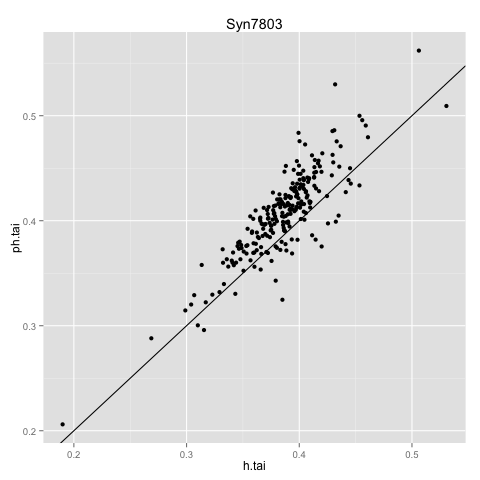

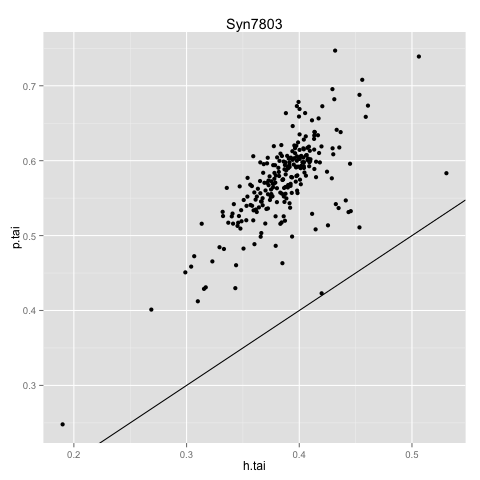

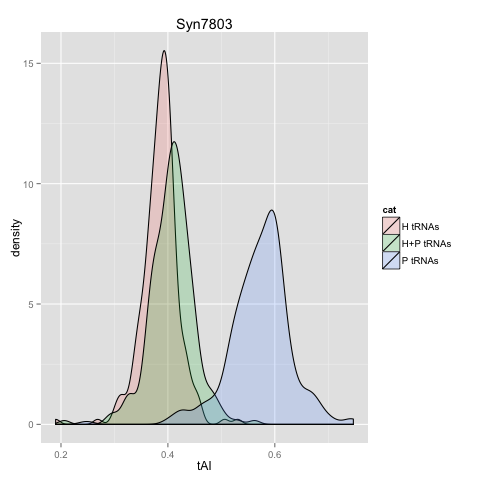

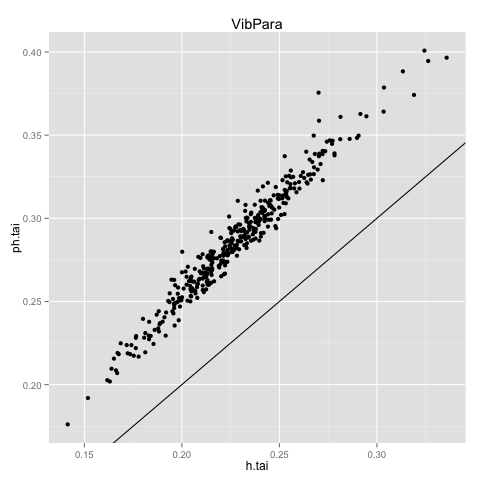

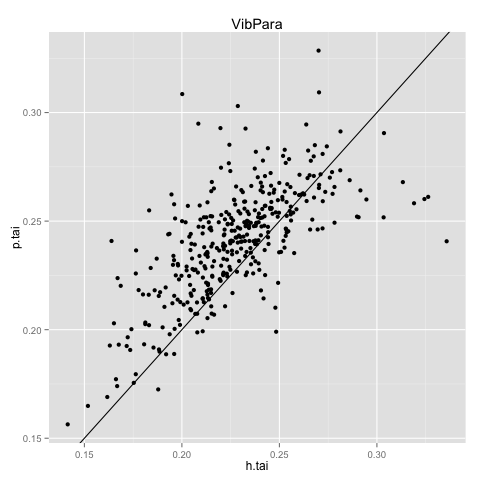

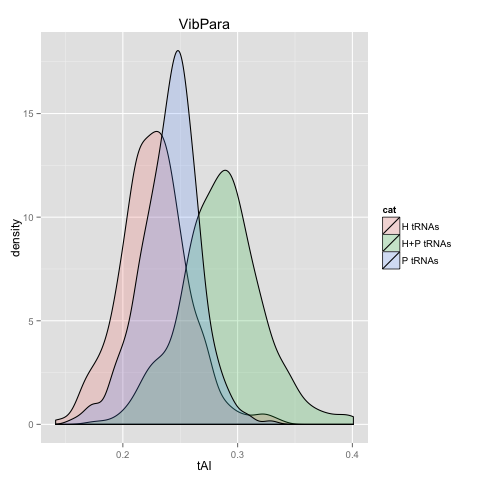

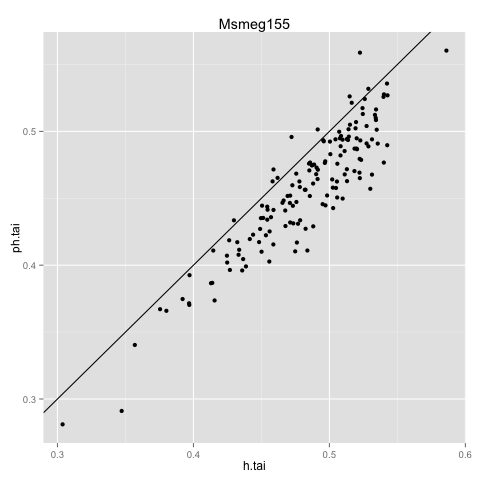

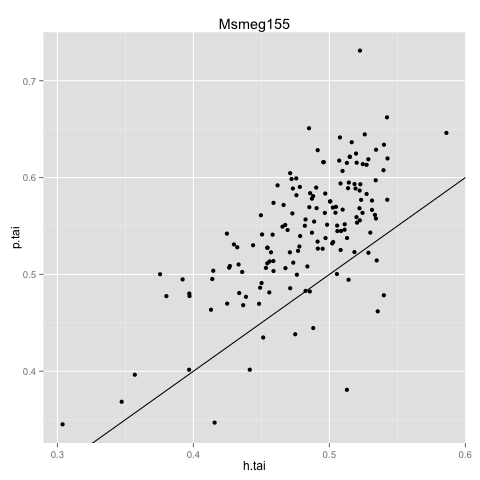

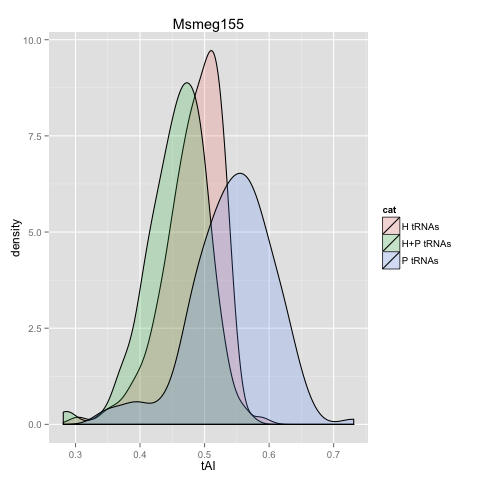

In [34]:
%%R -i paccs

for (i in seq(1,3)){
    ptrna=paste("./data/svm1/",paccs[i],".trna", sep="")
    htrna=paste("./data/svm1/",hosts[i],".trna", sep="")
    h.trna<-tscan_to_list(htrna)
    ph.trna<-ph_tscan_to_list(htrna, ptrna)
    
    h.ws<-get.ws(tRNA=h.trna, sking=1)
    h.m<-matrix(scan(paste("./data/svm1/",paccs[i],".cds.m", sep="")),ncol=61, byrow=T)
    h.m<-h.m[,-33]
    h.tai<-get.tai(h.m, h.ws)
    h<-data.frame(h.tai)
    h$cat<-"H tRNAs"
    colnames(h)[1]<-"tAI"
    
    ph.trna<-ph_tscan_to_list(htrna, ptrna)
    ph.ws<-get.ws(tRNA=ph.trna, sking=1)
    ph.tai<-get.tai(h.m, ph.ws)
    p<-data.frame(ph.tai)
    p$cat<-"H+P tRNAs"
    colnames(p)[1]<-"tAI"
    
    p.tai<-calculate_phage_trna_tai(ptrna,htrna, paste("./data/svm1/",paccs[i],".cds.m", sep=""))
    ponly<-data.frame(p.tai)
    ponly$cat<-"P tRNAs"
    colnames(ponly)[1]<-"tAI"
    
    #k<-lm(h.tai~p.tai)
    #print(hosts[i])
    #print(k)
    
    cbind.data.frame(h.tai, ph.tai)%>%ggplot(aes(h.tai, ph.tai))+geom_point()->g
    g<-g+labs(title=hosts[i])+geom_abline(intercept=0)
    plot(g)
    
    cbind.data.frame(h.tai, p.tai)%>%ggplot(aes(h.tai, p.tai))+geom_point()->j
    j<-j+labs(title=hosts[i])+geom_abline(intercept=0)
    plot(j)
    
    rbind.data.frame(p, h, ponly)%>%ggplot(., aes(tAI, fill=cat))+geom_density(alpha=0.2)->f
    f<-f+labs(title=hosts[i])
    plot(f)
}

So all this is super interesting, and suggests that these three different phage/host types have codon usages and trna profiles that differentially adapted to combining trna pools.

###OK, focusing first on Synechococcus-phage pair, how can I pull out the "outliers"?

In [21]:
%%R
calculate_ph_tais<-function(htrna, ptrna, codonM_file){
    h.trna<-tscan_to_list(htrna)
    ph.trna<-ph_tscan_to_list(htrna, ptrna)
    
    h.ws<-get.ws(tRNA=h.trna, sking=1)
    ph.ws<-get.ws(tRNA=ph.trna, sking=1)
    
    print("scanning codonM file")
    h.m<-matrix(scan(codonM_file),ncol=61, byrow=T)
    h.m<-h.m[,-33]
    
    h.tai<-get.tai(h.m, h.ws)
    ph.tai<-get.tai(h.m, ph.ws)
    
    return(cbind.data.frame(h.tai, ph.tai))
}

In [33]:
%%R
calculate_tai<-function(trna, codonM_file){
    h.trna<-tscan_to_list(trna)
    
    
    h.ws<-get.ws(tRNA=h.trna, sking=1)
    
    
    print("scanning codonM file")
    h.m<-matrix(scan(codonM_file),ncol=61, byrow=T)
    h.m<-h.m[,-33]
    
    h.tai<-get.tai(h.m, h.ws)
    
    
    return(h.tai)
}
    

In [35]:
%%R -i paccs -i hosts

ptrna=paste("./data/svm1/",paccs[1],".trna", sep="")
htrna=paste("./data/svm1/",hosts[1],".trna", sep="")
codonM_file=paste("./data/svm1/",hosts[1],".cds.m", sep="")

syn_tais<-calculate_ph_tais(htrna, ptrna, codonM_file)
head(syn_tais)

[1] "scanning codonM file"
Read 149572 items
      h.tai    ph.tai
1 0.4109584 0.3892384
2 0.3449635 0.3491012
3 0.4260898 0.3936734
4 0.4302716 0.4034548
5 0.4148991 0.3987700
6 0.4533300 0.4366784


[1] -0.3129293
[1] -0.342187


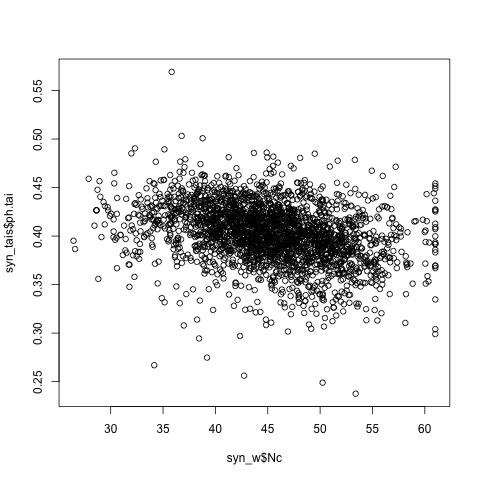

In [36]:
%%R
syn_tais%>%mutate(delta_tai=h.tai-ph.tai)->syn_tais

syn_w<-read.table("./data/svm1/Syn7803.w", header=TRUE, na.strings="*****")
plot(syn_tais$ph.tai~syn_w$Nc, use="p")
print(cor(syn_tais$ph.tai, syn_w$Nc, use="p"))
print(cor(syn_tais$h.tai, syn_w$Nc, use="p"))

In [68]:
%%R
syn.sh<-get.s(syn_tais$h.tai, syn_w$Nc, syn_w$GC3s)
syn.sph<-get.s(syn_tais$ph.tai, syn_w$Nc, syn_w$GC3s)
print(syn.sh)
print(syn.sph)

[1] 0.03189896
[1] 0.06423888


####S statistic, which dos Reis used to define overall genome adaptation, is low here, so he'd say that the genome is not highly translationally biased.

####Next looking into linear regression of tai values:

In [78]:
%%R
plot(syn_tais$h.tai, syn_tais$ph.tai, pch=21, col="blue",bg="red")
model<-lm(syn_tais$ph.tai~syn_tais$h.tai)
abline(model, col="red")
yhat<-predict(model, syn_tais$h.tai=syn_tais$h.tai)
#join<-function(i)
#    lines(c(syn_tais$h.tai[i],syn_tais$h.tai[i]), c(syn_tais$ph.tai[i], yhat[i]), col="green") 

#sapply(1:nrow(syn_tais), join)



Error while parsing the string.


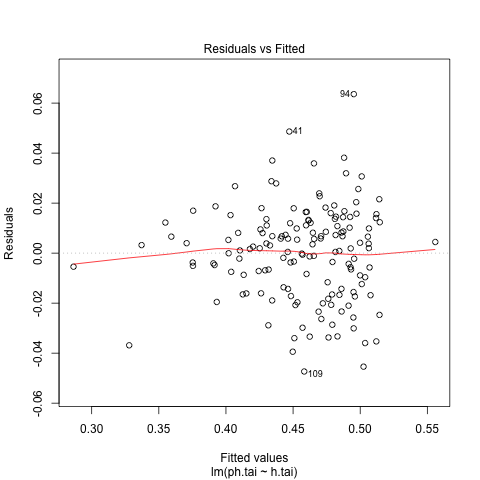

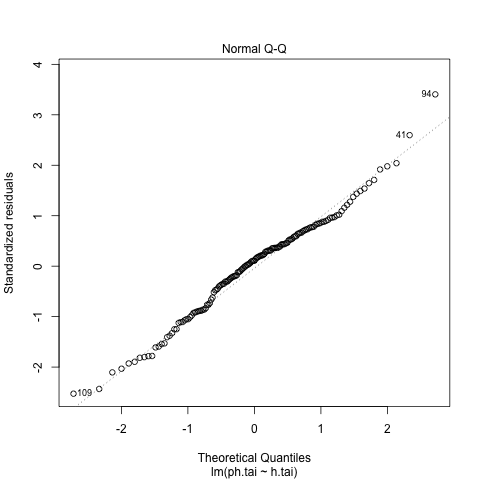

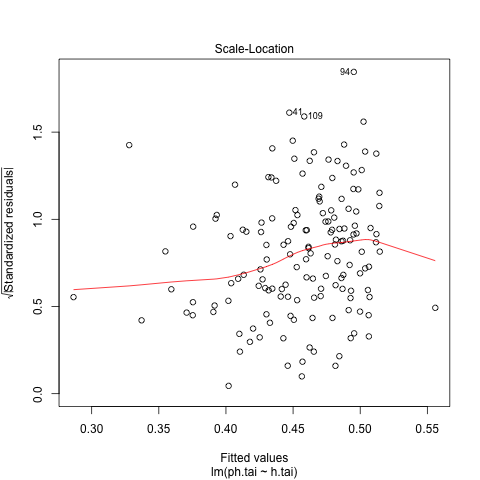

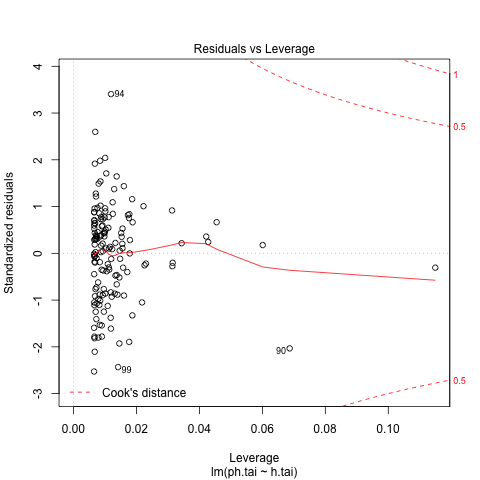

In [65]:
%%R
summary(model)
plot(model)

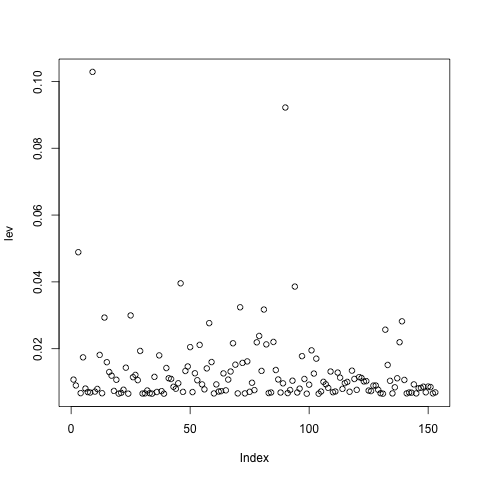

In [63]:
%%R
lev=hat(model.matrix(model))
plot(lev)

In [67]:
%%R
syn_tais[lev>0.08,]

         h.tai    ph.tai    delta_tai
9    0.4294449 0.3947564  0.034688545
90   0.3867128 0.3645822  0.022130571
162  0.4527909 0.4091996  0.043591320
243  0.4477300 0.4271107  0.020619283
315  0.4208157 0.3796833  0.041132401
396  0.4305083 0.4163060  0.014202305
468  0.4018662 0.3980651  0.003801097
549  0.4273856 0.4236763  0.003709255
621  0.4313691 0.4405786 -0.009209472
702  0.4629547 0.4191299  0.043824847
774  0.4452011 0.4152533  0.029947758
855  0.4023651 0.3771867  0.025178376
927  0.4882057 0.4462667  0.041938976
1008 0.4538918 0.4061404  0.047751327
1080 0.4075883 0.3917280  0.015860313
1161 0.4346732 0.3941645  0.040508691
1233 0.3923406 0.3749955  0.017345088
1314 0.3546830 0.3344227  0.020260374
1386 0.4449938 0.4116468  0.033347046
1467 0.4226125 0.3969418  0.025670747
1539 0.4405573 0.4130674  0.027489944
1620 0.3548409 0.3522324  0.002608494
1692 0.4379338 0.4122064  0.025727429
1773 0.4244374 0.4115936  0.012843821
1845 0.3309051 0.3078561  0.023048997
1926 0.42634

###Now looking into other tRNA containing phages of Synechococcus 7803

In [ ]:
#Hosts=["Mycobacterium", "Synechococcus","Vibrio"]
Hosts=["Synechococcus"]
syn_accs=[]
phage_info=open("./data/top_host_phage_info.txt")
for line in phage_info.readlines():
    host=line.split("\t")[0]
    trna_count=line.split("\t")[-3]
    name=line.split("\t")[3]
    if host in Hosts and int(trna_count)>0:
        syn_accs.append(line.split("\t")[2])
        print(line)

In [113]:
import os
from Bio import SeqIO
import subprocess

s7803p=[]    #vector of accession numbers for phages of Synechococcus strain 7803

for phage in syn_accs:
    gbk_file="./data/pgenomes/"+phage+".gbk"
    if os.path.exists(gbk_file):
        handle=SeqIO.parse(gbk_file, "genbank")
        for g in handle:
            for feature in g.features:
                if feature.type=="source":
                    if "host" in feature.qualifiers.keys():
                        hostish=(feature.qualifiers["host"][0])
                    elif "lab_host" in feature.qualifiers.keys():
                        hostish=(feature.qualifiers["lab_host"][0]+"***")
                    elif "isolate" in feature.qualifiers.keys():
                        hostish=(feature.qualifiers["isolate"][0])
                        #print(feature.qualifiers)
                    else:
                        hostish="none"
                        #print("no host specified for "+phage)
                        #print(feature.qualifiers)
        if "7803" in hostish:
            s7803p.append(phage)
    else:
        print("no gbk file for "+phage)
print(s7803p)

no gbk file for NC_022071.1
no gbk file for NC_021346.1
no gbk file for NC_015584.1
no gbk file for NC_021299.1
no gbk file for NC_021348.1
no gbk file for NC_023696.1
no gbk file for NC_008207.1
no gbk file for NC_011273.1
no gbk file for NC_008206.1
no gbk file for NC_013650.1
no gbk file for NC_021296.1
no gbk file for NC_021349.1
no gbk file for NC_004687.1
no gbk file for NC_023733.1
no gbk file for NC_023737.1
no gbk file for NC_011272.1
no gbk file for NC_011270.1
no gbk file for NC_011271.1
no gbk file for NC_023714.1
no gbk file for NC_011269.1
no gbk file for NC_023725.1
no gbk file for NC_021529.1
no gbk file for JN849462.1
['KJ019129.1', 'KJ019131.1', 'NC_027132.1', 'KJ019094.1', 'KJ019065.1', 'KJ019045.1', 'KJ019157.1', 'KJ019067.1', 'NC_023587.1', 'KJ019028.1', 'NC_021530.1', 'KJ019118.1', 'KJ019077.1', 'KJ019078.1', 'KJ019104.1', 'KJ019119.1', 'KJ019079.1', 'KJ019155.1', 'KF156339.1', 'KJ019115.1', 'KJ019128.1', 'KJ019122.1', 'KJ019043.1', 'HQ317291.1', 'KJ019130.1', 'KJ

In [114]:
len(s7803p)

151

#Examining ptcs of phage versus host based on host genome codon usage: